#Data Science - Gráficos com dados do World Bank
#Rony Ken Nagai | RM 551549
#2ESPF
---

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import io

url = 'https://databank.worldbank.org/data/download/WDI_csv.zip'

response = requests.get(url)
zip_file = ZipFile(io.BytesIO(response.content))

with zip_file.open('WDIData.csv') as file:
    df = pd.read_csv(file)

print(df.head())

countries = ['Brazil', 'Japan', 'United States', 'United Kingdom', 'China']
indicator = 'NY.GDP.MKTP.CD'
filtered_df = df[(df['Country Name'].isin(countries)) & (df['Indicator Code'] == indicator)]

filtered_df = filtered_df[['Country Name', '1990', '2000', '2010', '2020']]

print(filtered_df)

                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015       2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  17.392349  17.892005  18.359993   
1   NaN   NaN   NaN   NaN   NaN  ...   6.720331   7.015917   7.281390   
2   NaN   N

## Gráfico de Linha
O gráfico de linha mostra a evolução do PIB ao longo dos anos para cada um dos países selecionados.


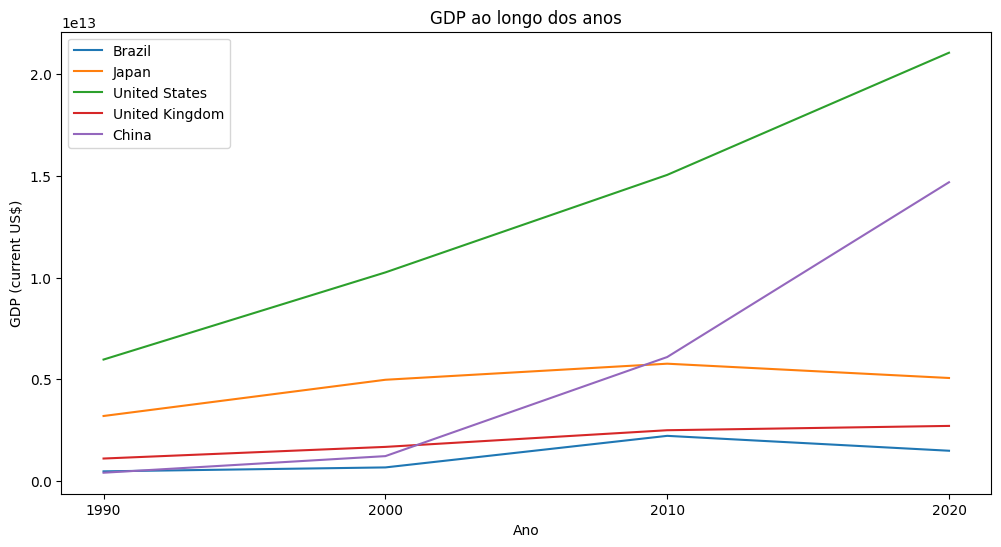

In [36]:
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(filtered_df.columns[1:], filtered_df[filtered_df['Country Name'] == country].values[0][1:], label=country)

plt.title('GDP ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.show()


## Gráfico de Barra
O gráfico de barra compara o PIB dos países em diferentes anos.

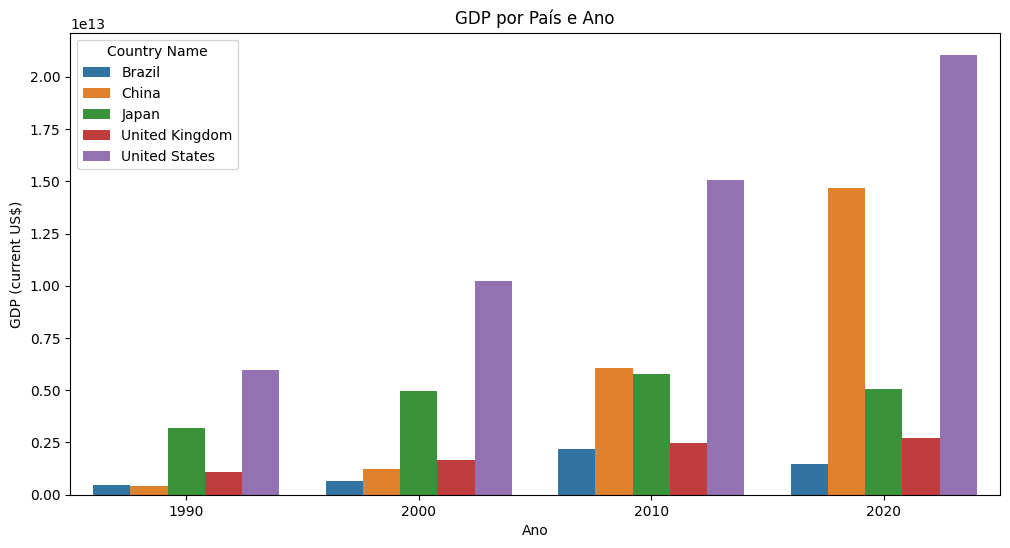

In [37]:
filtered_df_melted = filtered_df.melt(id_vars='Country Name', var_name='Year', value_name='GDP')

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df_melted, x='Year', y='GDP', hue='Country Name')
plt.title('GDP por País e Ano')
plt.xlabel('Ano')
plt.ylabel('GDP (current US$)')
plt.legend(title='Country Name')
plt.show()

## Histograma do PIB do Japão
O histograma mostra a distribuição do PIB do Japão ao longo dos anos (1990, 2000, 2010, 2020)..

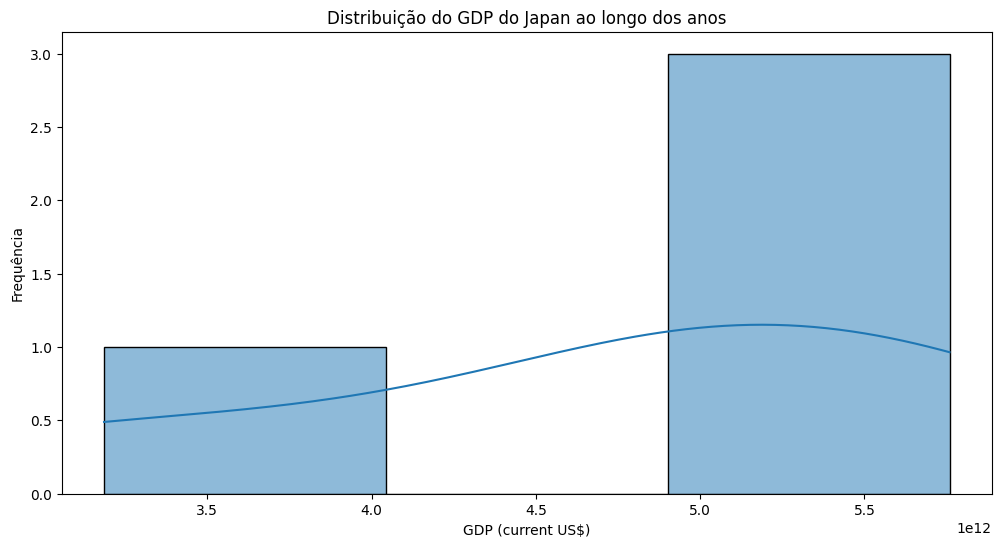

In [45]:
country = 'Japan'
years = ['1990', '2000', '2010', '2020']
gdp_values = filtered_df[filtered_df['Country Name'] == country][years].values.flatten()

plt.figure(figsize=(12, 6))
sns.histplot(gdp_values, kde=True, binwidth=1e12)

plt.title(f'Distribuição do GDP do {country} ao longo dos anos')
plt.xlabel('GDP (current US$)')
plt.ylabel('Frequência')
plt.show()

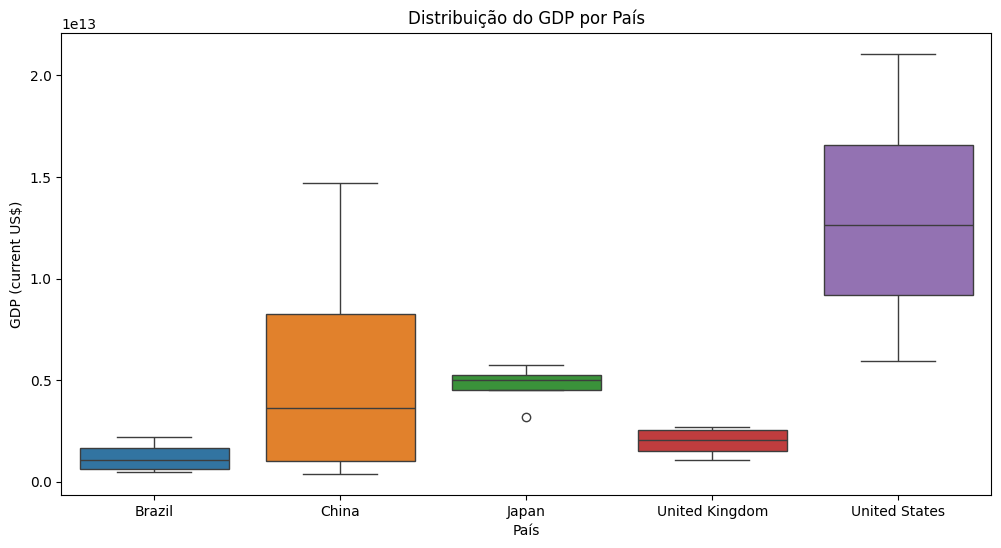

In [43]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df.set_index('Country Name').transpose())

plt.title('Distribuição do GDP por País')
plt.xlabel('País')
plt.ylabel('GDP (current US$)')
plt.show()

##Gráfico de Pizza
O gráfico de pizza exibe a proporção do PIB de cada país em 2020.

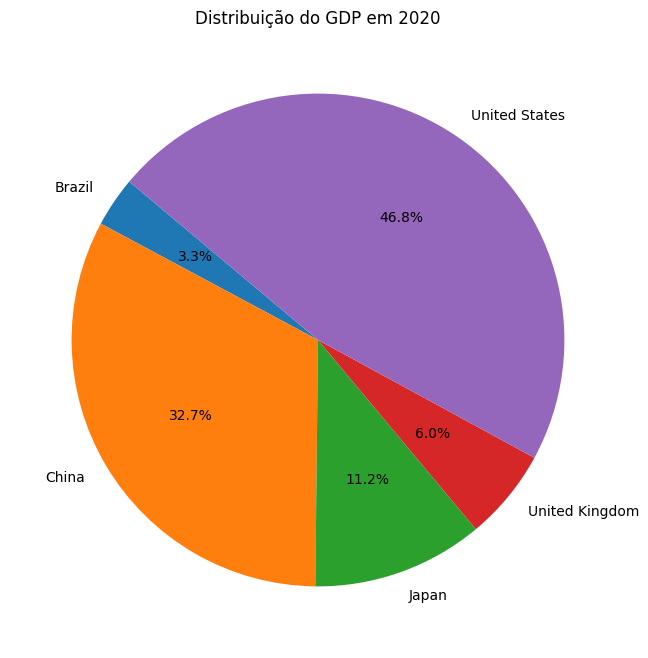

In [39]:
gdp_2020 = filtered_df.set_index('Country Name')['2020']

plt.figure(figsize=(8, 8))
plt.pie(gdp_2020, labels=gdp_2020.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do GDP em 2020')
plt.show()

##Gráfico de Dispersão
O gráfico de dispersão apresenta o PIB de cada país em 2020.

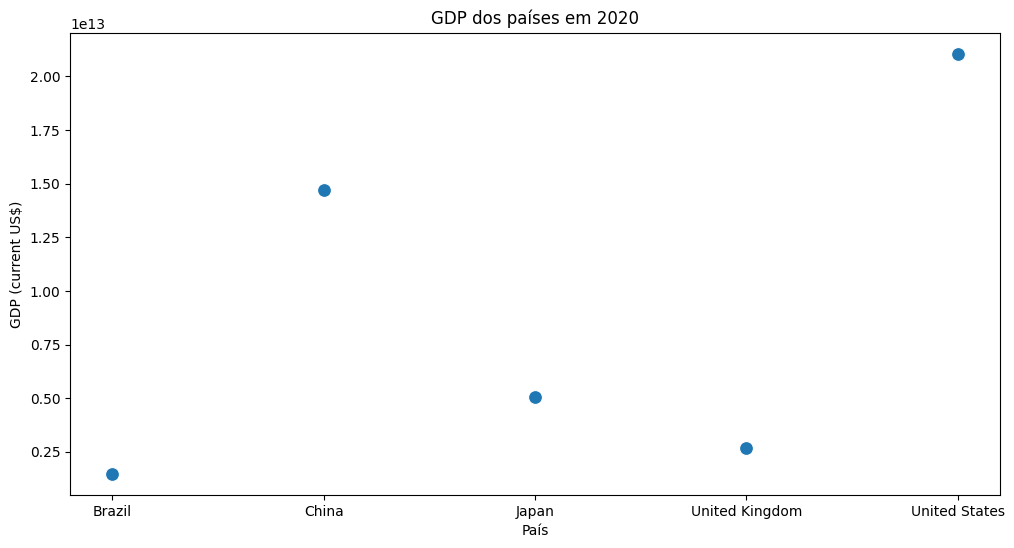

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='Country Name', y='2020', s=100)

plt.title('GDP dos países em 2020')
plt.xlabel('País')
plt.ylabel('GDP (current US$)')
plt.show()